In [ ]:
!pip install pymoo

     |████████████████████████████████| 2.5 MB 4.2 MB/s 
     |████████████████████████████████| 239 kB 39.2 MB/s 


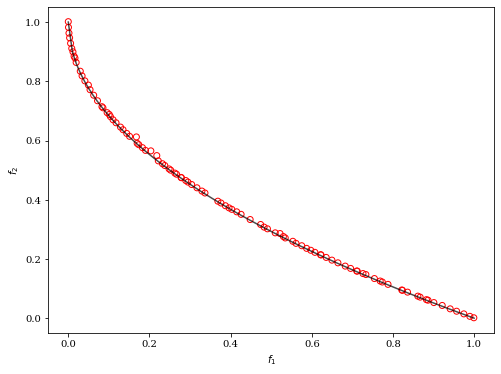

In [ ]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from pymoo.factory import get_problem, get_sampling, get_crossover, get_mutation, get_selection
from pymoo.factory import get_performance_indicator

problem = get_problem("zdt1")

algorithm = NSGA2(pop_size=100, sampling=get_sampling("real_lhs"))

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7 )
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

In [ ]:
from pymoo.factory import get_performance_indicator

pf = get_problem("zdt1").pareto_front()
# The result found by an algorithm
A = pf[::10] * 1.1

# plot the result
Scatter(legend=True).add(pf, label="Pareto-front").add(A, label="Result").show()
gd = get_performance_indicator("gd", res.F)
print("GD", gd.do(A))

igd = get_performance_indicator("igd", res.F)
print("IGD", igd.do(A))

gd_plus = get_performance_indicator("gd+", res.F)
print("GD+", gd_plus.do(A))

GD 0.05226509724745686
IGD 0.07210830778794303
GD+ 0.05226509724341164


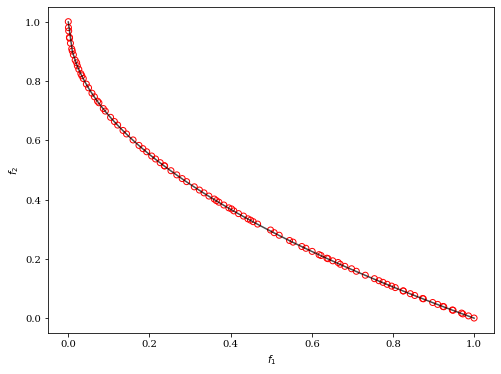

In [ ]:
algorithm = NSGA2(pop_size=100, sampling=get_sampling("bin_random"))

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

In [ ]:
gd = get_performance_indicator("gd", res.F)
print("GD", gd.do(A))

igd = get_performance_indicator("igd", res.F)
print("IGD", igd.do(A))

gd_plus = get_performance_indicator("gd+", res.F)
print("GD+", gd_plus.do(A))

GD 0.054277310688604176
IGD 0.07566991969523912
GD+ 0.054277310688604176


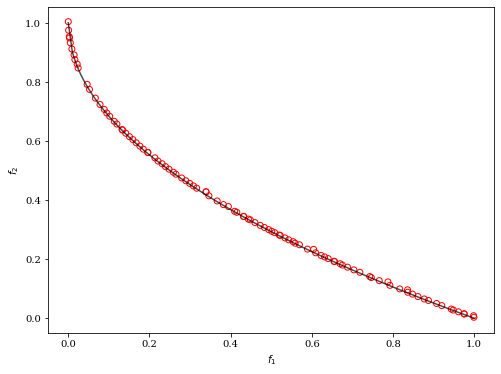

In [ ]:

algorithm = NSGA2(pop_size=100,
                  sampling=get_sampling("real_lhs"),
                  selection=get_selection("random"))

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

In [ ]:
gd = get_performance_indicator("gd", res.F)
print("GD", gd.do(A))

igd = get_performance_indicator("igd", res.F)
print("IGD", igd.do(A))

gd_plus = get_performance_indicator("gd+", res.F)
print("GD+", gd_plus.do(A))

GD 0.05296454946191385
IGD 0.07045673482102859
GD+ 0.05296454946191385


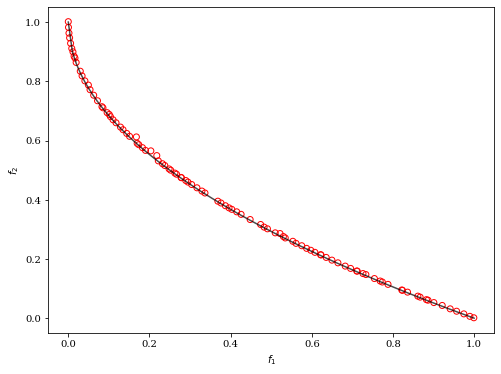

In [ ]:
def binary_tournament(pop, P, algorithm, **kwargs):

    # The P input defines the tournaments and competitors
    n_tournaments, n_competitors = P.shape

    if n_competitors != 2:
        raise Exception("Only pressure=2 allowed for binary tournament!")

    # the result this function returns
    import numpy as np
    S = np.full(n_tournaments, -1, dtype=np.int)

    # now do all the tournaments
    for i in range(n_tournaments):
        a, b = P[i]

        # if the first individiual is better, choose it
        if pop[a].F < pop[a].F:
            S[i] = a

        # otherwise take the other individual
        else:
            S[i] = b

    return S

selection=get_selection("tournament", {'pressure' : 2, 'func_comp' : binary_tournament})
algorithm = NSGA2(pop_size=100,
                  sampling=get_sampling("real_lhs"))

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

In [ ]:
gd = get_performance_indicator("gd", res.F)
print("GD", gd.do(A))

igd = get_performance_indicator("igd", res.F)
print("IGD", igd.do(A))

gd_plus = get_performance_indicator("gd+", res.F)
print("GD+", gd_plus.do(A))

GD 0.05226509724745686
IGD 0.07210830778794303
GD+ 0.05226509724341164


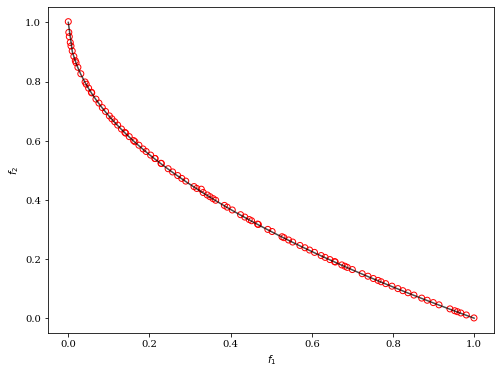

In [ ]:
selection=get_selection("tournament", {'pressure' : 2, 'func_comp' : binary_tournament})

algorithm = NSGA2(pop_size=100,
                  sampling=get_sampling("real_lhs"),
                  mutation=get_mutation("real_pm")) #perm_inv

res1 = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res1.F, facecolor="none", edgecolor="red")
plot.show()

In [ ]:
gd = get_performance_indicator("gd", res1.F)
print("GD", gd.do(A))

igd = get_performance_indicator("igd", res1.F)
print("IGD", igd.do(A))

gd_plus = get_performance_indicator("gd+", res1.F)
print("GD+", gd_plus.do(A))

GD 0.05404645003491182
IGD 0.07329499316466127
GD+ 0.054046450034858806


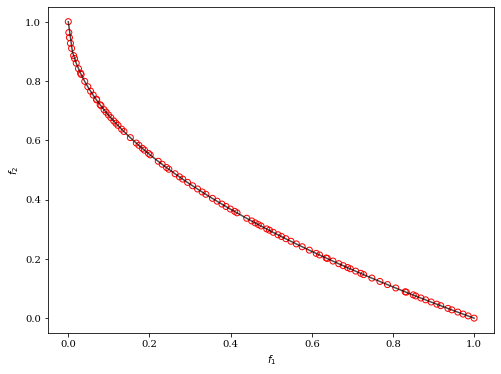

In [ ]:
selection=get_selection("tournament", {'pressure' : 2, 'func_comp' : binary_tournament})

algorithm = NSGA2(pop_size=100,
                  sampling=get_sampling("real_lhs"),
                  mutation=get_mutation("real_pm"),
                  crossover=get_crossover("bin_k_point", n_points=5))

res1 = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res1.F, facecolor="none", edgecolor="red")
plot.show()

In [ ]:
gd = get_performance_indicator("gd", res1.F)
print("GD", gd.do(A))

igd = get_performance_indicator("igd", res1.F)
print("IGD", igd.do(A))

gd_plus = get_performance_indicator("gd+", res1.F)
print("GD+", gd_plus.do(A))

GD 0.05468094819187087
IGD 0.07261654453617951
GD+ 0.05468094819187087


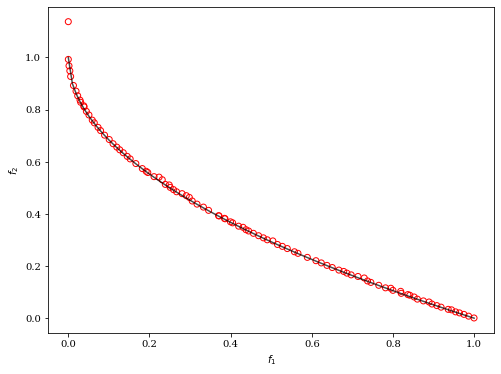

In [ ]:
selection=get_selection("tournament", {'pressure' : 2, 'func_comp' : binary_tournament})

algorithm = NSGA2(pop_size=100,
                  sampling=get_sampling("real_lhs"),
                  mutation=get_mutation("real_pm"),
                  crossover=get_crossover("bin_two_point"))

res1 = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res1.F, facecolor="none", edgecolor="red")
plot.show()

In [ ]:
gd = get_performance_indicator("gd", res1.F)
print("GD", gd.do(A))

igd = get_performance_indicator("igd", res1.F)
print("IGD", igd.do(A))

gd_plus = get_performance_indicator("gd+", res1.F)
print("GD+", gd_plus.do(A))

GD 0.04730188433347572
IGD 0.07001695499405351
GD+ 0.04357619687322064
